<p style='text-align:center'>
PSY 394U <b>Methods for fMRI</b>, Fall 2019


<img style='width: 300px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/Placebo_Left.png?raw=true' alt='brain blobs'/>

</p>

<p style='text-align:center; font-size:40px; margin-bottom: 30px;'><b>Neuroimaging data structure</b></p>

<p style='text-align:center; font-size:18px; margin-bottom: 32px;'><b>September 23, 2019</b></p>

<hr style='height:5px;border:none' />

# DICOM to NIfTI conversion
<hr style="height:1px;border:none" />

MRI scanners typically produce image data in their own format. The most common image data format from MRI scanners is DICOM. However, most neuroimaging analysis tools are not designed to handle DICOM images. Thus, first you need to convert DICOM to NIfTI format images. 

I do not cover details here, since this conversion is something you only need to do once, and there are a number of tools to do so. Here are some popular tools to convert DICOM images to NIfTI images:

* **dcm2niix**: (https://www.nitrc.org/plugins/mwiki/index.php/dcm2nii:MainPage)
* **mri_convert**: (https://surfer.nmr.mgh.harvard.edu/fswiki/mri_convert)
* **spm12** (Siemens only): (https://www.fil.ion.ucl.ac.uk/spm/software/spm12/)

# NIfTI file format (`.nii`)
<hr style="height:1px;border:none" />

## What is NIfTI format?

**NIfTI** stands for *Neuroimaging Informatics Technology Initiative*, with **`.nii`** extension. Before the NIfTI format, the predominant file format for neuroimaging research was the Analyze format (with `.hdr` and `.img` files). However, different software packages embedded different information in image data files, and consequently image data were not truly compatible once it has been processed in a certain software package. To address this issue, the NIfTI format was introduced. Today, most neuroimaging data are in the NIfTI format.

A NIfTI file consists of the header information (first 348 Bytes) and the image data (the rest of the file).

## NIfTI header

A typical NIfTI header includes a number of fields describing information regarding the image. Let's take a look at an example from an fMRI image. I am using the same file from the previous class (the flanker data set (a.k.a., `ds102`), subject 26). 

[`<ViewHeader.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/NIfTI_BIDS/ViewHeader.py)

In [1]:
import os
import numpy as np
import nibabel as nib


# Directory where your data set resides. 
dataDir = '/tmp/Data/ds102'

# reading in the fMRI data array
f_fMRI = os.path.join(dataDir,'sub-26/func/sub-26_task-flanker_run-2_bold.nii.gz')
fMRI = nib.load(f_fMRI)   # image object

# priting out the header information
hdr_fMRI = fMRI.header
print(hdr_fMRI)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  64  64  40 146   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 3. 3. 4. 2. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL4.0'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -94.5
qoffset_y       : -108.95783
qoffset_z       : -67.87952
srow_x          : [  3.    0.    0

There are a number of methods associated with the NIfTI header that provide you information you may be interested. First, the image dimension.

In [2]:
# image dimension
print(hdr_fMRI.get_data_shape())

(64, 64, 40, 146)


Here, the first 3 elements (**`64  64  40`**) show the number of voxels in the x, y, and z dimensions. The 4th element (**`146`**) is the number of time points in this fMRI time series. 

Next, data type.

In [3]:
# data type
print(hdr_fMRI.get_data_dtype())

int16


This shows that, the data format for each voxel value is **`int16`**, or 16-bit integer. If you ever want to change the data type to another format, you can use the **`set_data_dtype()`** method associated with the header. For example,
```python
hdr_fMRI.set_data_dtype('float32')
```
sets the data type to be 32-bit float.

The voxel size can be viewed by

In [4]:
# voxel size
print(hdr_fMRI.get_zooms())

(3.0, 3.0, 4.0, 2.0)


Here, the first 3 elements correspond to voxel sizes in mm in x-, y-, and z-directions, respectively. The last element refers to the repetition time (TR, time between scans) in seconds.

### Exercise
1. **Header info, T1 image**. Get the image dimension, data type, and voxel size from the T1 image of a randomly selected subject from the data set `ds102`. Post the resulting information (rather than the code) on Canvas.

## NIfTI data matrix

This portion of a NIfTI file consists of a series of 3D or 4D voxel intensities stored in a long sequence of numbers. There are several conventions to store voxel intensities such as:
  * **RAS**
      * First axis: x-axis left to **R**ight
      * Second axis: y-axis posterior to **A**nterior
      * Third axis: z-axis inferior to **S**uperior
  * **LAS**
      * First axis: x-axis right to **L**eft
      * Second axis: y-axis posterior to **A**nterior
      * Third axis: z-axis inferior to **S**uperior
      
Unless your data set consists of images acquired from different scanners with different protocols, you do not have to worry about how data are stored in a NIfTI file. Most image viewers and analysis software tools can display and process images in the desired orientation.

## Radiological vs. Neurological

One thing you have to deal with, in your analysis as well as when you read the neuroimaging literature, is the orientation how the brain is displayed. There are two conventions:
  * Neurological: 
      * Patient's left is displayed on the left
  * Radiological:
      * Patient's left is displayed on the right
      
<img style='width: 400px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2018/blob/master/Images/Affine_radio_neuro.jpg?raw=true' alt='Neurological or radiological'/>


When you examine image data, make sure which side of the subject is displayed on which side.

# BIDS
<hr style="height:1px;border:none" />

## Data

For this demonstration, in addition to the flanker data (`ds102`), we shall use the **test-retest data** from OpenNeuro.org. You can download [here](https://openneuro.org/datasets/ds000114/versions/1.0.1/download). I recommend creating a data directory named **`Data`** on your local computer, and under it creating a directory named **`ds114`** (i.e., `Data/ds114`). Then move the downloaded zip file to the `ds114` directory and unzip its contents. *Don't forget to mount the `Data` directory on your Docker!* 


## What is BIDS?

BIDS stands for Brain Imaging Data Structure. BIDS is a systematic way of organizing neurimaging data with a consistent structure. Before BIDS, each lab organized their neuroimaging data in their own way. This was a big obstacle in sharing data across different labs. Moreover, porting of any processing pipeline, from one lab to another, required a significant re-coding in order to accommodate different data organization. 

The complete specification of the BIDS is available from the [BIDS's web site](http://bids.neuroimaging.io/bids_spec.pdf). Here are highlights of BIDS:

* Hierarchical organization of directories
* Consistent naming of files and directories
* Specific file formats

## Hierarchical directory organization

In BIDS, directories are organized in a hierarchical fashion. From the top,
  * **Data set**. This is the directory containing all the data associated with a particular neuroimaging experiment.
  * **Subject**. Each subject or animal in the experiment has a directory. All data pertaining to that subject are stored there.
     * It should start with **`sub-`**, followed by a string identifying a subject.
        * For example, **`sub-control01`**, **`sub-patient15`**, or simply **`sub-03`**.
     * The subject number should be zero-padded. For example, **`01`** or **`001`** instead of **`1`**. This facilitates sorting of subjects according to their numbers.
  * **Session** (if applicable). A session refers to a visit in a longitudinal study, or a scanning session in a multi-session experiment. If there is only one session in the experiment, then this can be disregarded. 
     * It should start with **`ses-`** followed by the string identifying each session.
        * For example, **`ses-before`**, **`ses-time0`**, or **`ses-posttest`**.
  * **Modality**. This is a directory containing imaging and other data files associated with a particular imaging modality (e.g., structural images (T1 weighted images), functional images, diffusion weighted images, MEG, PET).
     * Suggested directory names are:
        * **`anat`** Structural image data, modalities including T1-weighted, T2-weighted, FLAIR, and proton density.
        * **`func`** Functional MRI data.
        * **`dwi`** Diffusion weighted images.
        * **`meg`** MEG (Magnetoencephalography)
        
***NB: Directory names are case sensitive. Use of lower case letters recommended.***

### Example

Here is the directory organization for the first two subjects for the `ds114` data set, viewed by the **`tree`** command.
```
../Data/ds114/
|...
|-- sub-01
|   |-- ses-retest
|   |   |-- anat
|   |   |   `-- sub-01_ses-retest_T1w.nii.gz
|   |   |-- dwi
|   |   |   `-- sub-01_ses-retest_dwi.nii.gz
|   |   `-- func
|   |       |-- sub-01_ses-retest_task-covertverbgeneration_bold.nii.gz
|   |       |...
|   |       `-- sub-01_ses-retest_task-overtwordrepetition_bold.nii.gz
|   `-- ses-test
|       |-- anat
|       |   `-- sub-01_ses-test_T1w.nii.gz
|       |-- dwi
|       |   `-- sub-01_ses-test_dwi.nii.gz
|       `-- func
|           |-- sub-01_ses-test_task-covertverbgeneration_bold.nii.gz
|           |...
|           `-- sub-01_ses-test_task-overtwordrepetition_bold.nii.gz
|-- sub-02
|   |-- ses-retest
|   |   |-- anat
|   |   |   `-- sub-02_ses-retest_T1w.nii.gz
|   |   |-- dwi
|   |   |   `-- sub-02_ses-retest_dwi.nii.gz
|   |   `-- func
|   |       |-- sub-02_ses-retest_task-covertverbgeneration_bold.nii.gz
|   |       |...
|   |       `-- sub-02_ses-retest_task-overtwordrepetition_bold.nii.gz
|   `-- ses-test
|       |-- anat
|       |   `-- sub-02_ses-test_T1w.nii.gz
|       |-- dwi
|       |   `-- sub-02_ses-test_dwi.nii.gz
|       `-- func
|           |-- sub-02_ses-test_task-covertverbgeneration_bold.nii.gz
|           |...
|           `-- sub-02_ses-test_task-overtwordrepetition_bold.nii.gz
|-- sub-03
|...
```

In this study, each subject underwent two sessions (`test` and `retest`). Within each session, there are directories for structural MRI (`anat`), fMRI (`func`), and diffusion images (`dwi`).

## Image data and how to name them

The recommended image format for BIDS is NIfTI (`.nii`). It can be either uncompressed or gzipped (**`.nii.gz`**).

### Structural image data naming convention (`anat`)

A structural image data file should be named by following this convention:
```
sub-<participant_label>[_ses-<session_label>]_<modality_label>.nii[.gz]
```
Here, the elements are:
  * **`sub-<participant_label>`**: Subject identifier, as explained above.
  * **`ses-<session_label>`**: Session identifier, where applicable, as explained above. If there is only one session in the experiment, this can be disregarded.
  * **`<modality_label>`**: Modality label. There are different labels:
     * **`T1w`**: T1-weighted (typical structural MRI)
     * **`T2w`**: T2-weighted
     * **`PD`**: Proton density

In addition to these, you can embed additional information to the file name such as acquisition parameters, contrast enhancement, reconstruction algorithms, and runs. You can find the additional information in the BIDS specification.

***Examples***:
```
sub-01_ses-retest_T1w.nii.gz
sub-10_T1w.nii.gz
```

### Functional image data naming convention (`func`)

A functional image data file should be named by following this convention:
```
sub-<participant_label>[_ses-<session_label>]_task-<task_label>[_run-<index>]_bold.nii[.gz]
```
Here, the elements are:
  * **`sub-<participant_label>`**: Subject identifier, as explained above.
  * **`ses-<session_label>`**: Session identifier, where applicable, as explained above. If there is only one session in the experiment, this can be disregarded.
  * **`task-<task_label>`**: Task identifier. Here, you need to name the task with a **`<task_label>`** consisting of letters and/or numbers (no special characters). 
     * Examples: `nback`, `stroop`, `fingertapping`, `rest`
  * **`run-<index>`**: Run index. Say, you have multiple runs of the same task in your experiment, you can distinguish them by including the run index. A run can be indicated by a single number (no zero padding is necessary). If there is only one run, then you can ignore this.
     * Examples: `run-1`, `run-2`
     
In addition to these, you can embed additional information to the file name. You can find the additional information in the BIDS specification.

***Examples***
```
sub-07_ses-test_task-overtverbgeneration_bold.nii.gz
sub-12_task-flanker_run-2_bold.nii.gz
```

### Diffusion image data naming convention (`dwi`)

Although we do not talk about diffusion images, it is common to acquire diffusion images during an fMRI experiment. Here is how you can name data files:
```
sub-<participant_label>[_ses-<session_label>][_run-<index>]_dwi.nii[.gz]
sub-<participant_label>[_ses-<session_label>][_run-<index>]_dwi.bval
sub-<participant_label>[_ses-<session_label>][_run-<index>]_dwi.bvec
```

Here, the elements for the name has already been explained above. One thing to note here is that you need, in addition to the NIfTI image, data files describing diffusion parameters. The **`.bvec`** file contains diffusion directions, and the **`.bval`** file contains diffusion values. The `.bvec` and `.bval` follow the format specified by FSL. For details, I refer you to the BIDS specification document.

## Other file formats and files

### Tabular files (`.tsv`)

If you want to include information in a tabular format, you need to use the tab separated value format (**`.tsv`**). A `.tsv` file is easily *readable* by humans. It is ideal to store information such as participant information or task timing information. 

***Examples***

Task information (see below for details):
```
onset  duration  response_time   correct   stop_trial   go_trial
200    20        0               n/a       n/a          n/a
```


Participant information (**`participants.tsv`**): (Located under the data set directory)
```
participant_id	 gender	  age
sub-01	         F	      21.94
sub-02	         M	      22.79
sub-03	         M	      19.65
...
```


### JSON dictionary files (`.json`)

A JSON (JavaScript Object Notation) file contains pairs of keys and values, just as a dictionary in python. JSON files can be used to describe details about data sets, sessions, runs, tasks, or imaging parameters. There are a number of JSON format files with specific fields (or keys). 

***Examples***

Image acquisition parameters:
```
{
	"RepetitionTime": 2.5,
	"Manufacturer": "Siemens",
	"ManufacturerModelName": "Allegra",
	"MagneticFieldStrength": 3.0,
	"ScanningSequence": "MPRAGE",
	"MRAcquisitionType": "3D",
	"EchoTime": 0.00393,
	"InversionTime": 0.90,
	"FlipAngle": 8.0
}
```

Task description:
```
{
    "EchoTime": 0.05,
    "FlipAngle": 90,
    "RepetitionTime": 5.0,
    "SliceTiming": [
        0.0,
        1.2499999999999998,
        0.08333333333333333,
        ...
        1.1666666666666665,
        2.416666666666665
    ],
    "TaskName": "overt_verb_generation"
}
```



### Required files

Some data files (`.tsv` or `.json`) are required by BIDS.

#### Data set description (`dataset_description.json`)
This is a JSON file located under the main data set directory, describing the data set. The following are the fields for this file:

  * **`Name`**: *REQUIRED.* Name of the dataset.
  * **`BIDSVersion`**: *REQUIRED.* The version of the BIDS standard that was used. FYI, this particular note is base on BIDS version **1.1.1**. 
  * **`Authors`**:  *OPTIONAL.* List of individuals who contributed to the creation/curation of       ReferencesAndLinks OPTIONAL. List of references to publication that contain information on the dataset, or links.
  * **`DatasetDOI`**: *OPTIONAL.* The Document Object Identifier of the dataset (not the
corresponding paper).

There are other recommended and optional fields. You can find more details in the BIDS specification document.

***Example***
```
{
    "Name":"Flanker task (event-related)",
    "BIDSVersion":"1.0.0rc3",
    "License":"PDDL",
    "Authors":["Kelly AMC","Uddin LQ","Biswal BB","Castellanos FX","Milham MP"],
    "HowToAcknowledge":"This data was obtained from the OpenfMRI database. Its accessio
n number is ds000102",
    "ReferencesAndLinks":["http://www.ncbi.nlm.nih.gov/pubmed/20974260","http://www.ncbi.nlm.nih.gov/pubmed/20079856","http://www.ncbi.nlm.nih.gov/pubmed/17919929"]
}
```

#### Task events (`.tsv`)

A `.tsv` file describing task events is required for an fMRI data. This file contains the onset time and duration of ALL trials during the fMRI acquisition. The file has to have the following columns:

  * **`onset`**: *REQUIRED.* Onset (in seconds) of the event measured from the beginning of the acquisition of the first volume in the corresponding task imaging data file. *If any acquired scans have been discarded before forming the imaging data file, ensure that a time of 0 corresponds to the first image stored. In other words negative numbers in “onset” are allowed.*
  * **`duration`**: *REQUIRED.* Duration of the event (measured from onset) in seconds. Must always be either zero or positive. A "duration" value of zero implies that the delta function or event is so short as to be effectively modeled as an impulse.
  * **`trial_type`**: *OPTIONAL.* Primary categorization of each trial to identify them as instances of the experimental conditions. 
     * For example: for a response inhibition task, it could take on values "go" and "no-go" to refer to response initiation and response inhibition experimental conditions.
  * **`response_time`**: *OPTIONAL.* Response time measured in seconds. A negative response time can be used to represent preemptive responses and “n/a” denotes a missed response.
  * **`stim_file`**: *OPTIONAL.* Represents the location of the stimulus file (image, video, sound etc.) presented at the given onset time. 

Additional columns can be added to facilitate organization of task event information.


The task events file follows the **inheritance principle** of BIDS. The file should be placed under each subject/session's `func` directory. However, if the information is identical across sessions/subjects, it can be placed in a parent directory. As for the location and naming of the task events file:
  * The task events `.tsv` file should be placed in the same directory as the corresponding fMRI file, with the name
```
sub-<participant_label>[_ses-<session_label>]_task-<task_label>[_run-<index>]_events.tsv
```

  * If the task events file is identical across runs, or there is only one run, then you only need one `.tsv` file
```
sub-<participant_label>[_ses-<session_label>]_task-<task_label>_events.tsv
```

  * If the task events file is identical across sessions and across runs, then the `.tsv` file can be named as
```
sub-<participant_label>_task-<task_label>_events.tsv
```
and placed under the **subject's directory**.

  * If the task events file is identical across subjects, across sessions, and across runs, then the `.tsv` file can be named as
```
task-<task_label>_events.tsv
```
and placed under the **data set directory**.



***Examples***

```
onset	duration	weight	trial_type
10	    15.0	    1	    Finger
40	    15.0	    1	    Foot
70	    15.0	    1	    Lips
...
```

```
onset   duration    trial_type   response_time   stim_file
1.2     0.6         go           1.435           images/red_square.jpg
5.6     0.6         stop         1.739           images/blue_square.jpg
...
```



### Optional, but useful files

The following are optional but useful files. I do not explain details here, so please consult the BIDS specification documentation for more details.

#### `participants.tsv`, `participants.json`
**Purpose**: To list participants and their information (`.tsv`). Any additional information can be stored in the accompanying JSON file (`.json`).
**Location**: Under the data set directory
**Examples**:

`participants.tsv`
```
participant_id	dominant_hand
sub-01	        left
sub-02	        right
sub-03	        right
...
```

#### Image meta information
Information associated with image acquisition (TR, flip angle, slice timing, etc.) can be found in the image meta information file (`.json`). The file name (except the extension) should be identical to the corresponding image (`.nii`) file. However, the **inheritance principle** applies here as well; if the imaging parameters are identical, you may find only one meta information file (`.json`) for each image type under the data set directory.

***Examples***

T1-weighted meta information:
```
{
	"RepetitionTime": 2.5,
	"Manufacturer": "Siemens",
	"ManufacturerModelName": "Allegra",
	"MagneticFieldStrength": 3.0,
	"ScanningSequence": "MPRAGE",
	"MRAcquisitionType": "3D",
	"EchoTime": 0.00393,
	"InversionTime": 0.90,
	"FlipAngle": 8.0
}
```

fMRI meta information for a certain task:
```
{
    "EchoTime": 0.05,
    "FlipAngle": 90,
    "RepetitionTime": 2.5,
    "SliceTiming": [
        0.0,
        1.2499999999999998,
        0.08333333333333333,
        ...
        2.333333333333332,
        1.1666666666666665,
        2.416666666666665
    ],
    "TaskName": "finger_foot_lips"
}
```

#### Task events meta information (`.json`)
In addition to the task events information, additional meta information can be provided as a JSON file. Its name and location should be identical to the task events `.tsv` file, except the extension.

# Handling data with `pybids`
<hr style="height:1px;border:none" />

The **`pybids`** library provides some functionalities to query a BIDS data set, enabling you to access data files and meta data.

## `BIDSLayout` for simple queries

You can query information from a BIDS data set by creating a **layout** object. A layout object simplifies accessing the content of a BIDS data set so that you don't have to scroll a long list of files and directories manually!

[`<ExtractBIDSInfo.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/NIfTI_BIDS/ExtractBIDSInfo.py)

In [2]:
import os
from bids.layout import BIDSLayout


# Directory where your data set resides.
dataDir = '/tmp/Data/ds114'

# Creating the layout object for this BIDS data set
layout = BIDSLayout(dataDir)

Now a layout object is created. So let's see some info associated with this data set. First, a list of subjects.

In [3]:
# subjects
subjList = layout.get_subjects()

In [4]:
subjList

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']

Notice that the prefix `sub-` has been automatically removed. 

Next, sessions.

In [5]:
# sessions
sesList = layout.get_sessions()

In [6]:
sesList

['retest', 'test']

Again, the prefix `ses-` has been automatically removed. 

Next, data types.

Next, different tasks under `func`.

In [9]:
# tasks
taskList = layout.get_tasks()

In [10]:
taskList

['covertverbgeneration',
 'fingerfootlips',
 'linebisection',
 'overtverbgeneration',
 'overtwordrepetition']

Are there multiple runs? We shall see.

In [11]:
# runs
runList = layout.get_runs()

In [12]:
runList

[]

Nothing is returned, meaning that there is only one run for this data set.

You can also generate a list of data you are interested. For example, we can make a list of all fMRI data for subject `01` by

In [19]:
# List of all fMRI data for subject 01
fMRI_sub01 = layout.get(subject='01', 
                        suffix='bold', 
                        extension=['nii', 'nii.gz'],
                        return_type='file')

In [20]:
fMRI_sub01

['/tmp/Data/ds114/sub-01/ses-retest/func/sub-01_ses-retest_task-covertverbgeneration_bold.nii.gz',
 '/tmp/Data/ds114/sub-01/ses-retest/func/sub-01_ses-retest_task-fingerfootlips_bold.nii.gz',
 '/tmp/Data/ds114/sub-01/ses-retest/func/sub-01_ses-retest_task-linebisection_bold.nii.gz',
 '/tmp/Data/ds114/sub-01/ses-retest/func/sub-01_ses-retest_task-overtverbgeneration_bold.nii.gz',
 '/tmp/Data/ds114/sub-01/ses-retest/func/sub-01_ses-retest_task-overtwordrepetition_bold.nii.gz',
 '/tmp/Data/ds114/sub-01/ses-test/func/sub-01_ses-test_task-covertverbgeneration_bold.nii.gz',
 '/tmp/Data/ds114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz',
 '/tmp/Data/ds114/sub-01/ses-test/func/sub-01_ses-test_task-linebisection_bold.nii.gz',
 '/tmp/Data/ds114/sub-01/ses-test/func/sub-01_ses-test_task-overtverbgeneration_bold.nii.gz',
 '/tmp/Data/ds114/sub-01/ses-test/func/sub-01_ses-test_task-overtwordrepetition_bold.nii.gz']

Or we can focus just on `test` session.

In [21]:
# Lets focus on test session
fMRI_sub01_test = layout.get(subject='01', 
                             session='test',
                             suffix='bold', 
                             extension=['nii', 'nii.gz'],
                             return_type='file')

In [22]:
fMRI_sub01_test

['/tmp/Data/ds114/sub-01/ses-test/func/sub-01_ses-test_task-covertverbgeneration_bold.nii.gz',
 '/tmp/Data/ds114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz',
 '/tmp/Data/ds114/sub-01/ses-test/func/sub-01_ses-test_task-linebisection_bold.nii.gz',
 '/tmp/Data/ds114/sub-01/ses-test/func/sub-01_ses-test_task-overtverbgeneration_bold.nii.gz',
 '/tmp/Data/ds114/sub-01/ses-test/func/sub-01_ses-test_task-overtwordrepetition_bold.nii.gz']

Say, we are interested in meta data associated with the covert verb generation task (`covertverbgeneration`).

In [23]:
# A list of files associated with the covert verb generation 
# (covertverbgeneration) task
list_covertverbgen = layout.get(task='covertverbgeneration',
                                extension=['tsv','json'],
                                return_type='file')

In [24]:
list_covertverbgen

['/tmp/Data/ds114/task-covertverbgeneration_bold.json',
 '/tmp/Data/ds114/task-covertverbgeneration_events.tsv']

Finally, a list of T1 weighted images from everybody.

In [25]:
# a list of T1w images from everybody
listT1w = layout.get(suffix='T1w',
                     extensions=['nii','nii.gz'],
                     return_type='file')

In [26]:
listT1w

['/tmp/Data/ds114/sub-01/ses-retest/anat/sub-01_ses-retest_T1w.nii.gz',
 '/tmp/Data/ds114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz',
 '/tmp/Data/ds114/sub-02/ses-retest/anat/sub-02_ses-retest_T1w.nii.gz',
 '/tmp/Data/ds114/sub-02/ses-test/anat/sub-02_ses-test_T1w.nii.gz',
 '/tmp/Data/ds114/sub-03/ses-retest/anat/sub-03_ses-retest_T1w.nii.gz',
 '/tmp/Data/ds114/sub-03/ses-test/anat/sub-03_ses-test_T1w.nii.gz',
 '/tmp/Data/ds114/sub-04/ses-retest/anat/sub-04_ses-retest_T1w.nii.gz',
 '/tmp/Data/ds114/sub-04/ses-test/anat/sub-04_ses-test_T1w.nii.gz',
 '/tmp/Data/ds114/sub-05/ses-retest/anat/sub-05_ses-retest_T1w.nii.gz',
 '/tmp/Data/ds114/sub-05/ses-test/anat/sub-05_ses-test_T1w.nii.gz',
 '/tmp/Data/ds114/sub-06/ses-retest/anat/sub-06_ses-retest_T1w.nii.gz',
 '/tmp/Data/ds114/sub-06/ses-test/anat/sub-06_ses-test_T1w.nii.gz',
 '/tmp/Data/ds114/sub-07/ses-retest/anat/sub-07_ses-retest_T1w.nii.gz',
 '/tmp/Data/ds114/sub-07/ses-test/anat/sub-07_ses-test_T1w.nii.gz',
 '/tmp/Data/ds114/su

### Exercise
1. **Even and odd lists**. Write a program to generate two lists of BOLD fMRI data (with `.nii.gz`) from the `ds102` data set; the first list contains the file names from even-numbered subjects, and the second list contains the file names from odd-numbered subjects. 

## Reading meta data

Using functionalities of `pybids`, we can read meta data associated with a BIDS data set. This is done by locating appropriate meta data files, and in case of JSON files, we can actually read meta data from files. 

### Reading participant information

So, this is not exactly the application of `pybids`, as we use `pandas` to read a `.tsv` meta data file. However, we can locate the `participants.tsv` file using the **`get`** method for a BIDSLayout object.

[`<ReadMetaData.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/NIfTI_BIDS/ReadMetaData.py)

In [27]:
%matplotlib inline

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from bids.layout import BIDSLayout

# Directory where your data set resides.
dataDir = '/tmp/Data/ds102'

# Creating the layout objects
layout = BIDSLayout(dataDir)


# PARTICIPANT INFORMATION

# reading in participant info (tsv read as pandas data frame)
file_participants = layout.get(suffix='participants',
                               extension='tsv',
                               return_type='file')[0]
subjInfo = pd.read_csv(file_participants, delimiter='\t')

In [29]:
subjInfo

,participant_id,gender,age
0,sub-01,F,21.94
1,sub-02,M,22.79
2,sub-03,M,19.65
3,sub-04,M,25.98
4,sub-05,M,23.24
5,sub-06,M,23.27
6,sub-07,D,34.72
7,sub-08,D,22.22
8,sub-09,M,22.70
9,sub-10,D,25.24


### Reading image meta data

There is a method called **`get_metadata`** that reads the meta data associated with an image data file. This method works even if the meta data file does not reside in the same directory as the image file, *as long as the inheritance principle is observed.*

[`<ReadMetaData.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/NIfTI_BIDS/ReadMetaData.py)

In [30]:
# Images for sub-01
listImages_sub01 = layout.get(subject='01',
                              extension=['nii', 'nii.gz'],
                              return_type='file')

In [31]:
listImages_sub01

['/tmp/Data/ds102/sub-01/anat/sub-01_T1w.nii.gz',
 '/tmp/Data/ds102/sub-01/func/sub-01_task-flanker_run-1_bold.nii.gz',
 '/tmp/Data/ds102/sub-01/func/sub-01_task-flanker_run-2_bold.nii.gz']

In [32]:
# meta data asccoiated with T1 weighted
metaT1w = layout.get_metadata(listImages_sub01[0])

In [33]:
metaT1w

{'EchoTime': 0.00393,
 'FlipAngle': 8.0,
 'InversionTime': 0.9,
 'MRAcquisitionType': '3D',
 'MagneticFieldStrength': 3.0,
 'Manufacturer': 'Siemens',
 'ManufacturerModelName': 'Allegra',
 'RepetitionTime': 2.5,
 'ScanningSequence': 'MPRAGE'}

This meta data file is not in the `anat` directory for this particular subject, but at 

In [35]:
# locations of meta data files (T1w)
metalocT1w = layout.get(suffix='T1w',
                        extension='json',
                        return_type='file')

In [36]:
metalocT1w

['/tmp/Data/ds102/T1w.json']

The meta data file for an fMRI data file.

In [37]:
# meta data associated with fMRI (run1)
metafMRI = layout.get_metadata(listImages_sub01[1])

In [38]:
metafMRI

{'CogAtlasID': 'tsk_4a57abb949a4f',
 'EchoTime': 0.03,
 'FlipAngle': 80.0,
 'MRAcquisitionType': '2D',
 'MagneticFieldStrength': 3.0,
 'Manufacturer': 'Siemens',
 'ManufacturerModelName': 'Allegra',
 'RepetitionTime': 2.0,
 'ScanningSequence': 'Echo Planar',
 'TaskDescription': 'On each trial (inter-trial interval (ITI) varied between 8 s and 14 s; mean ITI=12 s),participants used one of two buttons on a response pad to indicate the direction of a central arrow in an array of 5 arrows. In congruent trials the flanking arrows pointed in the same direction as the central arrow (e.g., < < < < <), while in more demanding incongruent trials the flanking arrows pointed in the opposite direction (e.g., < < > < <). Subjects performed two 5-minute blocks, each containing 12 congruent and 12 incongruent trials, presented in a pseudorandom order.',
 'TaskName': 'Flanker'}

You may notice that the meta data are returned as a dictionary. So, you can specify a particular field as the key and you should be able to get the corresponding value.  

In [39]:
metaT1w['ScanningSequence']

'MPRAGE'

In [40]:
metafMRI['ScanningSequence']

'Echo Planar'

In [41]:
metafMRI['RepetitionTime']

2.0

### Reading task events data

Task events are stored as a `.tsv` file. Thus, we can read task event information as a data frame, as we have seen earlier. To identify the task events data file, you can use the **`get`** method associated with the layout.

[`<ReadMetaData.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/NIfTI_BIDS/ReadMetaData.py)

In [42]:
# Task events tsv file for sub-01, run-1
taskTSV = layout.get(subject='01',
                     run='1',
                     suffix='events',
                     extension='tsv',
                     return_type='file')[0]

In [43]:
taskTSV

'/tmp/Data/ds102/sub-01/func/sub-01_task-flanker_run-1_events.tsv'

In [44]:
# reading the task info (as pandas data frame)
taskInfo = pd.read_csv(taskTSV, delimiter='\t')

In [45]:
taskInfo

,onset,duration,trial_type,response_time,correctness,StimVar,Rsponse,Stimulus,cond
0,0.0,2.0,incongruent_correct,1.095,correct,2,1,incongruent,cond003
1,10.0,2.0,incongruent_correct,0.988,correct,2,1,incongruent,cond003
2,20.0,2.0,congruent_correct,0.591,correct,1,1,congruent,cond001
3,30.0,2.0,congruent_correct,0.499,correct,1,1,congruent,cond001
4,40.0,2.0,incongruent_correct,0.719,correct,2,1,incongruent,cond003
5,52.0,2.0,congruent_correct,0.544,correct,1,1,congruent,cond001
6,64.0,2.0,congruent_correct,0.436,correct,1,1,congruent,cond001
7,76.0,2.0,incongruent_correct,0.470,correct,2,1,incongruent,cond003
8,88.0,2.0,congruent_correct,0.409,correct,1,1,congruent,cond001
9,102.0,2.0,incongruent_correct,0.563,correct,2,1,incongruent,cond003


Just for fun, we shall plot how the response time changes over the course of the experiment. In particular, we plot the event time on the x-axis and the response time on the y-axis.

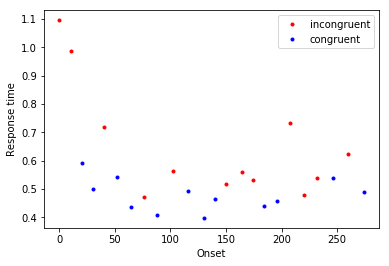

In [46]:
# Just for fun. Plotting the response time over experiment
plt.plot(taskInfo[taskInfo.Stimulus=='incongruent'].onset,
         taskInfo[taskInfo.Stimulus=='incongruent'].response_time,
         'r.',
         label='incongruent')
plt.plot(taskInfo[taskInfo.Stimulus=='congruent'].onset,
         taskInfo[taskInfo.Stimulus=='congruent'].response_time,
         'b.',
         label='congruent')
plt.xlabel('Onset')
plt.ylabel('Response time')
plt.legend()
plt.show()

### Exercise
**Average response time**. Write a program to read the task event meta data file from a subject. The program then calculates the average response time for the congruent and incongruent conditions.


## Creating paths

You can use `pybids` to generate paths for directories and files that are compliant with the BIDS standard.

### Building directory names
Say, you want to add additional subjects to your BIDS data. You can create directories for the new subjects easily with `pybids`. Say you want to add 8 additional subjects (`11`, `12`, ..., `18`) to `ds114` data set. Then you can generate paths for the directories for these new subjects.

[`<BuildPaths.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/NIfTI_BIDS/BuildPaths.py)

In [47]:
import os
from bids.layout import BIDSLayout

# Directory where your data set resides. 
dataDir = '/tmp/Data/ds114'

# Creating the layout object for this BIDS data set
layout = BIDSLayout(dataDir)

# new subjects
newSubj = list(range(10,19))

# other information for the directory organization
listSes = ['test', 'retest']
listMod = ['anat', 'func', 'dwi']


First, directories for the new subjects.

In [48]:
# first, a list of new subject directories
pattern = "sub-{subject}"
for iSubj in newSubj:
    # dictionary listing entitied
    entities = {'subject':'%02d' % iSubj}
    newDir = layout.build_path(entities, path_patterns=[pattern])
    print(newDir)

sub-10
sub-11
sub-12
sub-13
sub-14
sub-15
sub-16
sub-17
sub-18


Here, inside **`pattern`**, the field inside the curly brackets (**`subject`** in this case) was replaced by the value associated with the key `subject` inside a dictionary **`entities`**.

For each subject, there should be session directories.

In [49]:
# session directories for each subject
pattern = "sub-{subject}/ses-{session}"
for iSubj in newSubj:
    for iSes in listSes:
        # dictionary listing entitied
        entities = {'subject':'%02d' % iSubj,
                    'session':iSes}
        newDir = layout.build_path(entities, path_patterns=[pattern])
        print(newDir)

sub-10/ses-test
sub-10/ses-retest
sub-11/ses-test
sub-11/ses-retest
sub-12/ses-test
sub-12/ses-retest
sub-13/ses-test
sub-13/ses-retest
sub-14/ses-test
sub-14/ses-retest
sub-15/ses-test
sub-15/ses-retest
sub-16/ses-test
sub-16/ses-retest
sub-17/ses-test
sub-17/ses-retest
sub-18/ses-test
sub-18/ses-retest


Here, the dictionary `entities` have two keys, `subject` and `session`. The values corresponding to these keys are used to create paths.

And different modalities for each session.

In [50]:
# image modality directories for each subject
pattern = "sub-{subject}/ses-{session}/{modality}"
for iSubj in newSubj:
    for iSes in listSes:
        for iMod in listMod:
            # dictionary listing entitied
            entities = {'subject':'%02d' % iSubj,
                        'session':iSes,
                        'modality':iMod}
            newDir = layout.build_path(entities, path_patterns=[pattern])
            print(newDir)

sub-10/ses-test/anat
sub-10/ses-test/func
sub-10/ses-test/dwi
sub-10/ses-retest/anat
sub-10/ses-retest/func
sub-10/ses-retest/dwi
sub-11/ses-test/anat
sub-11/ses-test/func
sub-11/ses-test/dwi
sub-11/ses-retest/anat
sub-11/ses-retest/func
sub-11/ses-retest/dwi
sub-12/ses-test/anat
sub-12/ses-test/func
sub-12/ses-test/dwi
sub-12/ses-retest/anat
sub-12/ses-retest/func
sub-12/ses-retest/dwi
sub-13/ses-test/anat
sub-13/ses-test/func
sub-13/ses-test/dwi
sub-13/ses-retest/anat
sub-13/ses-retest/func
sub-13/ses-retest/dwi
sub-14/ses-test/anat
sub-14/ses-test/func
sub-14/ses-test/dwi
sub-14/ses-retest/anat
sub-14/ses-retest/func
sub-14/ses-retest/dwi
sub-15/ses-test/anat
sub-15/ses-test/func
sub-15/ses-test/dwi
sub-15/ses-retest/anat
sub-15/ses-retest/func
sub-15/ses-retest/dwi
sub-16/ses-test/anat
sub-16/ses-test/func
sub-16/ses-test/dwi
sub-16/ses-retest/anat
sub-16/ses-retest/func
sub-16/ses-retest/dwi
sub-17/ses-test/anat
sub-17/ses-test/func
sub-17/ses-test/dwi
sub-17/ses-retest/anat
sub-1

Here, I am printing out directory names. If you want to create these directories, then you need to change the `print` function with `os.mkdir` function.

You may notice that these paths are relative paths from the data set directory:

In [51]:
layout.root

'/tmp/Data/ds114'

If you want to change these paths to absolute paths, you need to add a new line:

In [52]:
newDir = os.path.join(layout.root, newDir)

In [53]:
newDir

'/tmp/Data/ds114/sub-18/ses-retest/dwi'

### Building file names

The same principle we used to create directory names can also be used to create file names. Say, we create all fMRI image data files for `sub-01`, `ses-test`. 

`<BuildPaths.py>`

In [54]:
# bold fMRI data with different tasks
listTask = ['covertverbgeneration',
            'fingerfootlips',
            'linebisection',
            'overtverbgeneration',
            'overtwordrepetition']
pattern = "sub-{subject}/ses-{session}/{modality}/sub-{subject}_ses-{session}_task-{task}_{type}.nii.gz"
for iTask in listTask:
    entities = {'subject':'01',
                'session':'test',
                'modality':'func',
                'task':iTask,
                'type':'bold'}
    newFile = layout.build_path(entities, path_patterns=[pattern])
    print(newFile)

sub-01/ses-test/func/sub-01_ses-test_task-covertverbgeneration_bold.nii.gz
sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz
sub-01/ses-test/func/sub-01_ses-test_task-linebisection_bold.nii.gz
sub-01/ses-test/func/sub-01_ses-test_task-overtverbgeneration_bold.nii.gz
sub-01/ses-test/func/sub-01_ses-test_task-overtwordrepetition_bold.nii.gz


### Exercise (optional)
1. **New tasks**. Say, you need to add new fMRI data to the `ds114` data set. The new data for each subject were acquired during two tasks (`nback` and `stroop`). These tasks were performed during both sessions but only by even-numbered subjects (`02`, `04`, ..., `18`). Generate a list of these new data files (`.nii.gz` file and the task event file `.tsv`), with an appropriate path originating from the data set directory.